In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

DATA_DIR = '../data/processed'
FILE_REG_TRTRAB = os.path.join(DATA_DIR, 'clean_PUB_REG_TRTRAB.csv')
FILE_TRAM5_REG = os.path.join(DATA_DIR, 'clean_PUB_TRAM5_REG.csv')
FILE_TRAM5_COMU = os.path.join(DATA_DIR, 'clean_PUB_TRAM5_COMU.csv')

df_reg_trtrab = pd.read_csv(FILE_REG_TRTRAB)
df_tram5_reg = pd.read_csv(FILE_TRAM5_REG)
df_tram5_comu = pd.read_csv(FILE_TRAM5_COMU)

print('Datos cargados:')
print(f'Registros REG_TRTRAB: {df_reg_trtrab.shape}')
print(f'Registros TRAM5_REG: {df_tram5_reg.shape}')
print(f'Registros TRAM5_COMU: {df_tram5_comu.shape}')

Datos cargados:
Registros REG_TRTRAB: (1676, 23)
Registros TRAM5_REG: (1689, 23)
Registros TRAM5_COMU: (32650, 25)


## Filtrado y limpieza
Conservamos solo las cuatro regiones objetivo y normalizamos las columnas numéricas usadas más adelante.

In [2]:
TARGET_REGIONS = [
    'Región de Los Lagos',
    'Región de La Araucanía',
    'Región de Los Ríos',
    'Región del Biobío'
]

def clean_numeric_column(df, col_name):
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce').fillna(0)
    return df

def filter_and_clean(df, region_col):
    subset = df[df[region_col].isin(TARGET_REGIONS)].copy()
    if 'ventas_anuales_en_uf' in subset.columns:
        subset = clean_numeric_column(subset, 'ventas_anuales_en_uf')
    if 'número_de_trabajadores_dependientes_informados' in subset.columns:
        subset = clean_numeric_column(subset, 'número_de_trabajadores_dependientes_informados')
    return subset

df_reg_filtered = filter_and_clean(df_tram5_reg, 'región_del_domicilio_o_casa_matriz')
df_comu_filtered = filter_and_clean(df_tram5_comu, 'región_del_domicilio_o_casa_matriz')

print(f'Registros filtrados (regional): {df_reg_filtered.shape}')
print(f'Registros filtrados (comunal): {df_comu_filtered.shape}')
df_reg_filtered.head()

Registros filtrados (regional): (400, 23)
Registros filtrados (comunal): (10054, 25)


,año_comercial,tramo_según_ventas_5_tramos,región_del_domicilio_o_casa_matriz,número_de_empresas,ventas_anuales_en_uf,número_de_trabajadores_dependientes_informados,renta_neta_informada_en_uf,trabajadores_ponderados_por_meses_trabajados,número_de_trabajadores_dependientes_de_género_femenino_informados,trabajadores_de_género_femenino,...,trabajadores_de_género_masculino_ponderados_por_meses_trabajados,número_de_trabajadores_a_honorarios_informados,honorarios_pagados_informados_en_uf,trabajadores_a_honorarios_ponderados_por_meses_trabajados,número_de_trabajadores_a_honorarios_de_género_femenino_informados,honorarios_pagados_informados_a_trabajadores_de_género_femenino_en_uf,trabajadores_a_honorarios_de_género_femenino_ponderados_por_meses_trabajados,número_de_trabajadores_a_honorarios_de_género_masculino_informados,honorarios_pagados_informados_a_trabajadores_de_género_masculino_en_uf,trabajadores_a_honorarios_de_género_masculino_ponderados_por_meses_trabajados
8,2005,Sin Ventas/Sin Información,Región del Biobío,10310,0.00,35942,7639259.814310817,29963.496341,21773,4.640216e+06,...,11484.915033,10688,623995.7216618317,0.0,5257,291608.6626570617,0.0,5431,332117.6544568766,0.0
9,2005,Sin Ventas/Sin Información,Región de La Araucanía,6443,0.00,9519,1913974.211912144,7725.332208,4951,1.042287e+06,...,3547.249361,4317,250276.2817087187,0.0,1642,86004.3159067262,0.0,2675,164120.6835179967,0.0
10,2005,Sin Ventas/Sin Información,Región de Los Lagos,5897,0.00,6151,1009495.689137435,4803.999110,2827,5.268899e+05,...,2458.916138,2556,110550.5901422779,0.0,967,38279.1279221199,0.0,1589,72269.7732644534,0.0
14,2005,Sin Ventas/Sin Información,Región de Los Ríos,2626,0.00,2316,407308.594302721,1902.083068,1178,2.295500e+05,...,915.249868,1150,81170.234666078,0.0,490,22556.9832368296,0.0,660,58613.2536356727,0.0
25,2005,Micro,Región del Biobío,45092,21700540.42,38211,3092522.244857363,22674.158221,13851,1.483091e+06,...,13023.160693,39213,823737.2647668266,0.0,19446,357021.1067562328,0.0,19767,465929.7352524149,0.0


## Tendencias regionales
Ventas y empleo por año para cada región.

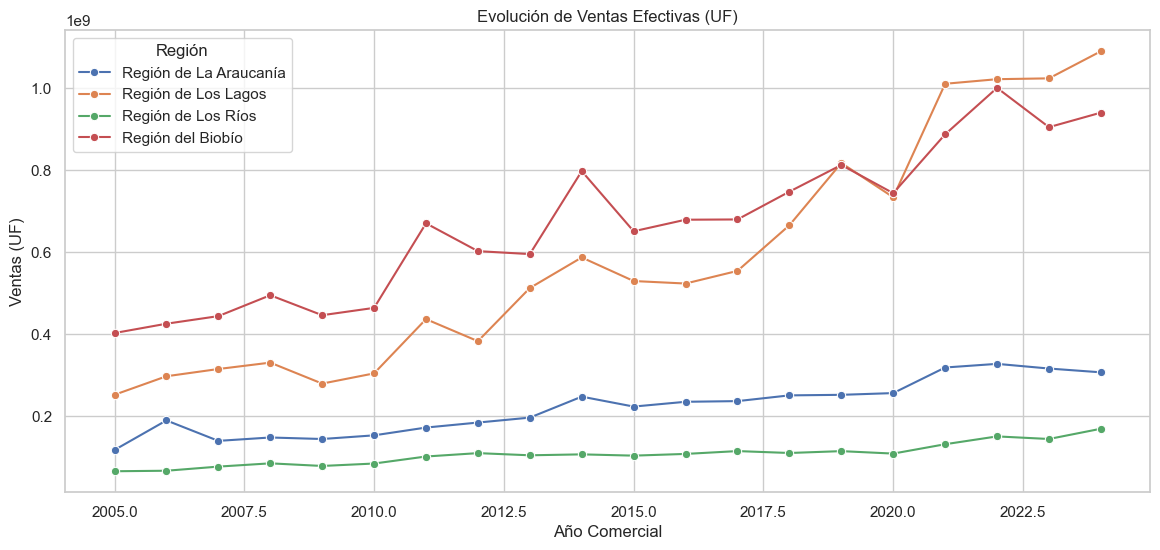

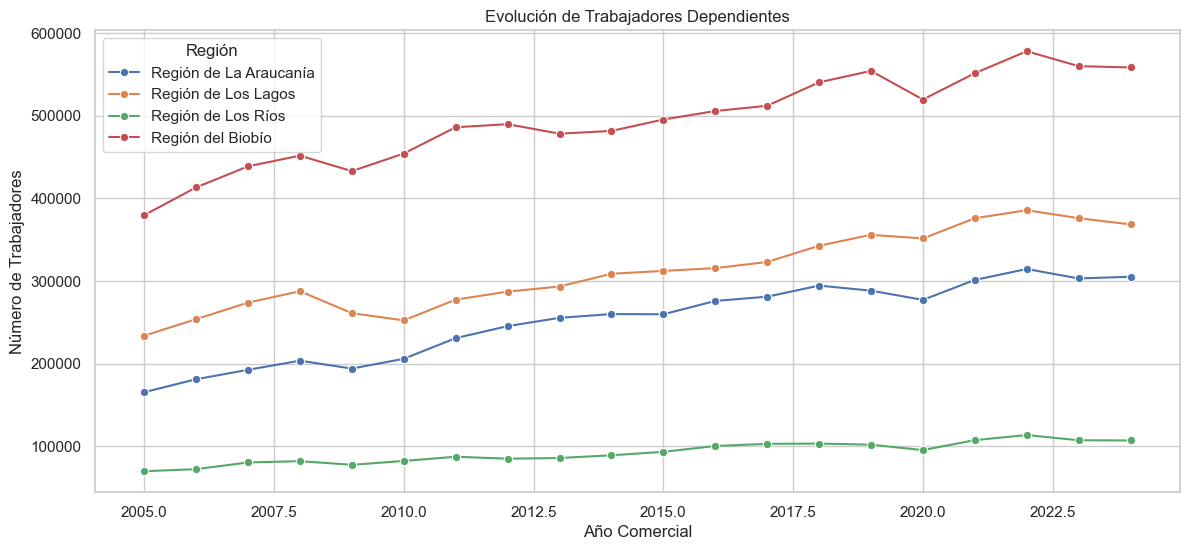

In [3]:
regional_trends = df_reg_filtered.groupby(['año_comercial', 'región_del_domicilio_o_casa_matriz'])[[
    'ventas_anuales_en_uf',
    'número_de_trabajadores_dependientes_informados'
]].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=regional_trends,
    x='año_comercial',
    y='ventas_anuales_en_uf',
    hue='región_del_domicilio_o_casa_matriz',
    marker='o'
)
plt.title('Evolución de Ventas Efectivas (UF)')
plt.ylabel('Ventas (UF)')
plt.xlabel('Año Comercial')
plt.legend(title='Región')
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=regional_trends,
    x='año_comercial',
    y='número_de_trabajadores_dependientes_informados',
    hue='región_del_domicilio_o_casa_matriz',
    marker='o'
)
plt.title('Evolución de Trabajadores Dependientes')
plt.ylabel('Número de Trabajadores')
plt.xlabel('Año Comercial')
plt.legend(title='Región')
plt.show()

## Comunas destacadas
Promedios por comuna para identificar líderes en ventas y empleo.

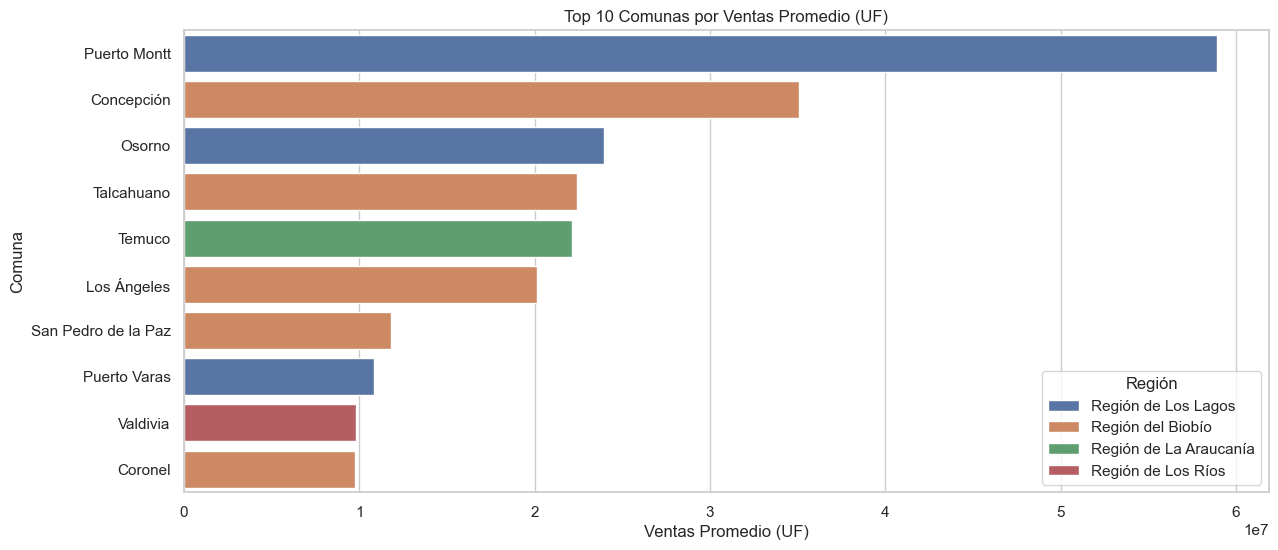

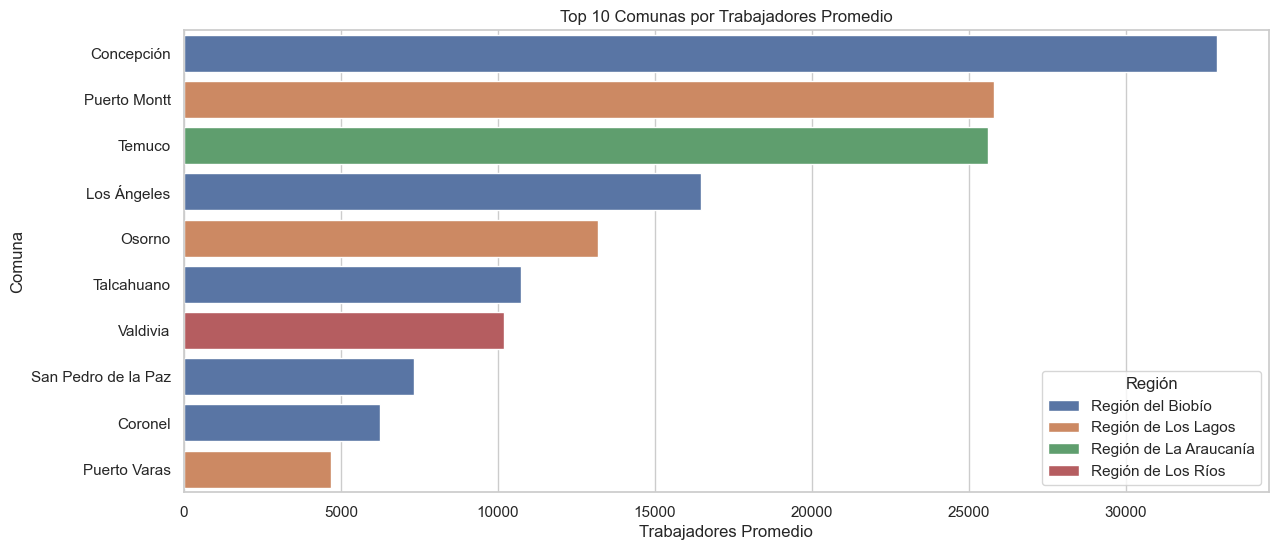

In [4]:
comuna_stats = df_comu_filtered.groupby(['comuna_del_domicilio_o_casa_matriz', 'región_del_domicilio_o_casa_matriz'])[[
    'ventas_anuales_en_uf',
    'número_de_trabajadores_dependientes_informados'
]].mean().reset_index()

top_sales_comunas = comuna_stats.nlargest(10, 'ventas_anuales_en_uf')
top_workers_comunas = comuna_stats.nlargest(10, 'número_de_trabajadores_dependientes_informados')

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_sales_comunas,
    x='ventas_anuales_en_uf',
    y='comuna_del_domicilio_o_casa_matriz',
    hue='región_del_domicilio_o_casa_matriz',
    dodge=False
)
plt.title('Top 10 Comunas por Ventas Promedio (UF)')
plt.xlabel('Ventas Promedio (UF)')
plt.ylabel('Comuna')
plt.legend(title='Región')
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_workers_comunas,
    x='número_de_trabajadores_dependientes_informados',
    y='comuna_del_domicilio_o_casa_matriz',
    hue='región_del_domicilio_o_casa_matriz',
    dodge=False
)
plt.title('Top 10 Comunas por Trabajadores Promedio')
plt.xlabel('Trabajadores Promedio')
plt.ylabel('Comuna')
plt.legend(title='Región')
plt.show()

## Ventas vs. empleo por comuna
Comparación directa entre ambas métricas y correlación general.

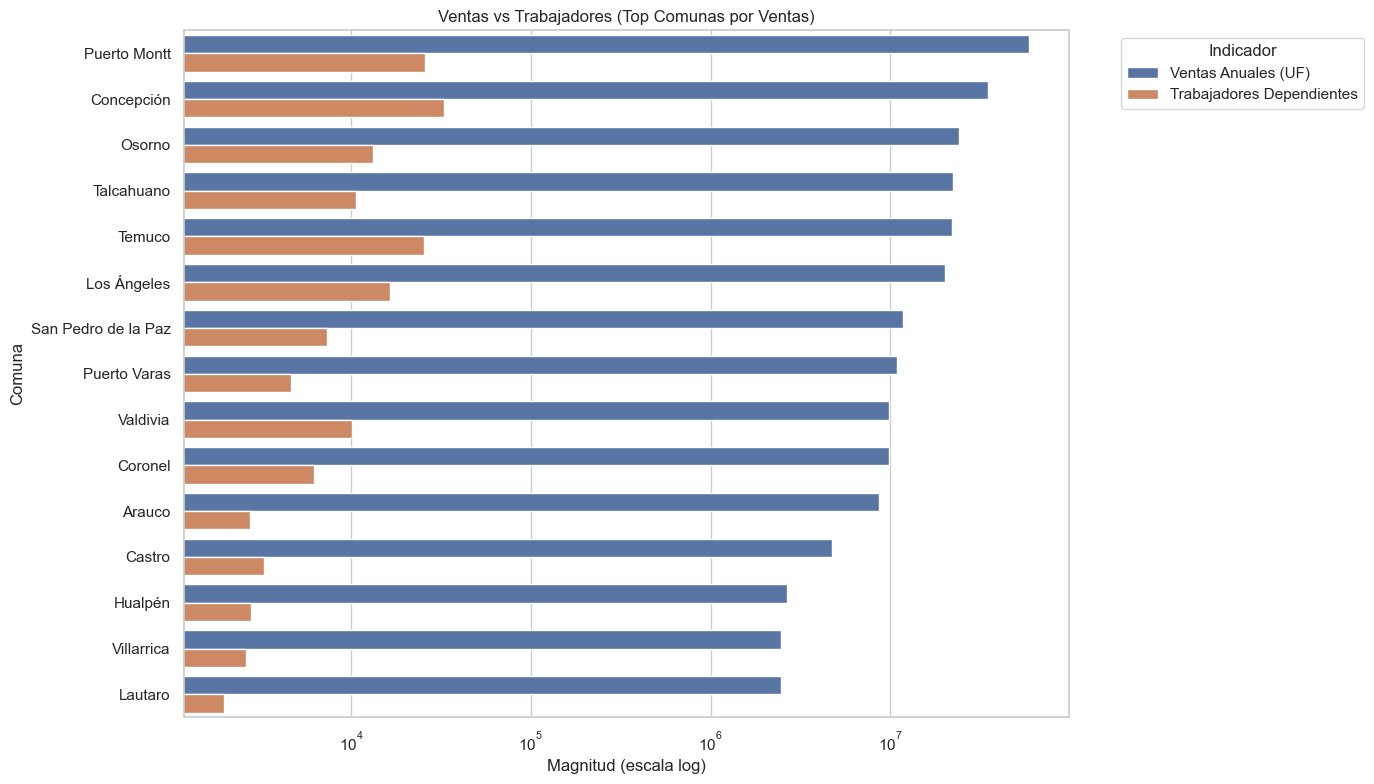

Matriz de correlación ventas vs trabajadores:


,ventas_anuales_en_uf,número_de_trabajadores_dependientes_informados
ventas_anuales_en_uf,1.000000,0.917529
número_de_trabajadores_dependientes_informados,0.917529,1.000000


In [5]:
TOP_N = 15
comunas_destacadas = (
    comuna_stats.sort_values('ventas_anuales_en_uf', ascending=False)
    .head(TOP_N)
    .copy()
)

plot_data = comunas_destacadas.melt(
    id_vars=['comuna_del_domicilio_o_casa_matriz', 'región_del_domicilio_o_casa_matriz'],
    value_vars=['ventas_anuales_en_uf', 'número_de_trabajadores_dependientes_informados'],
    var_name='indicador',
    value_name='valor'
)
plot_data['indicador'] = plot_data['indicador'].map({
    'ventas_anuales_en_uf': 'Ventas Anuales (UF)',
    'número_de_trabajadores_dependientes_informados': 'Trabajadores Dependientes'
})

plt.figure(figsize=(14, 8))
sns.barplot(
    data=plot_data,
    x='valor',
    y='comuna_del_domicilio_o_casa_matriz',
    hue='indicador',
    dodge=True
)
plt.xscale('log')
plt.title('Ventas vs Trabajadores (Top Comunas por Ventas)')
plt.xlabel('Magnitud (escala log)')
plt.ylabel('Comuna')
plt.legend(title='Indicador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

correlation = comuna_stats[[
    'ventas_anuales_en_uf',
    'número_de_trabajadores_dependientes_informados'
]].corr()
print('Matriz de correlación ventas vs trabajadores:')
correlation